In [1]:
require("glmnet")

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-2



In [2]:
train <- read.csv('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M2/Train.csv', header = TRUE, row.names = 1)
test <- read.csv('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M2/Test.csv', header = TRUE, row.names = 1)

In [3]:
head(train)

,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BODYFAT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1.1993862,-1.2446088,-0.58693843,-0.5063531,-0.3800723,-0.474835195,-0.3397599,-0.8237111,-0.09546210,-0.03107795,-1.3438442,-0.2421628,-0.6815004,-0.99719172,-0.6225535,9.4
1,0.1886404,-0.6886836,-0.01265434,0.4452692,-0.2162775,0.394002986,-0.2376379,-0.1360909,0.09683674,0.02822586,-0.2898806,-1.0718366,0.1049640,-0.09322521,-0.4012419,16.8
2,0.5561843,0.5025849,0.08923477,0.6355937,-0.2162775,1.393166894,-0.1099853,-0.1664271,-0.46403488,-0.44620467,0.1931861,0.2858114,0.4469050,0.65121780,1.4799070,14.1
3,-0.5734728,-0.1327583,-0.21643257,-1.0773265,0.4716608,-0.170741832,0.4644511,-0.1967633,-0.81658276,-0.11014971,0.2810164,0.8892105,0.5836814,0.11947279,0.7053163,22.6
4,1.3291076,-0.4504299,-1.90223424,-0.8870020,-1.9197437,-2.733814465,-1.9098861,-1.5821158,-1.77807697,-1.79042453,-1.6073351,-1.4489610,-2.0492645,-2.91147375,-2.2823908,8.4
5,1.8263730,-0.2121762,-1.49467779,-1.0773265,-1.2645644,0.003025805,-1.5907548,-1.4203228,-1.71397735,-1.41483369,-1.5195048,-0.3175877,-1.5021589,-0.57179572,0.3733488,4.9


In [4]:
# linear regression with lasso penalty(no regularization on weight&heights)
penalty = c(1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
clf <- cv.glmnet(data.matrix(train[, 2:15]), as.vector(train[, 16]), family = 'gaussian', alpha = 1, nfolds = 5, standarize = FALSE, penalty.factor = penalty)

In [5]:
pred <- predict(clf, newx = data.matrix(test[, 2:15]), type = 'link', s = 'lambda.min')
coef_sum <- coef(clf, s = 'lambda.min')
assess.glmnet(clf, newx = data.matrix(test[, 2:15]), newy = as.vector(test[, 16]), s = 'lambda.min')

$mse
lambda.min 
  24.15506 
attr(,"measure")
[1] "Mean-Squared Error"

$mae
lambda.min 
  3.899551 
attr(,"measure")
[1] "Mean Absolute Error"

In [6]:
coef_sum

15 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 18.4839956
AGE          1.5638946
WEIGHT       3.1023656
HEIGHT       0.4009115
ADIPOSITY    3.2049412
NECK        -1.4175940
CHEST       -3.2060826
ABDOMEN      5.6410388
HIP         -3.0377235
THIGH        1.3772475
KNEE         0.2025441
ANKLE       -0.3524515
BICEPS       0.3399989
FOREARM      0.1290761
WRIST       -1.4385721

In [7]:
df <- data.frame(y_true = as.vector(test[, 16]), y_pred = as.vector(pred[, 1]))

extract top features

In [8]:
coef_sum <- coef(clf, s = 'lambda.min')
coef_sum <-  as.data.frame(as.matrix(coef_sum))
coef_sum$abs <- abs(as.vector(coef_sum[, 1]))
coef_sum[order(coef_sum$abs,decreasing=TRUE),]

,s1,abs
,<dbl>,<dbl>
(Intercept),18.4839956,18.4839956
ABDOMEN,5.6410388,5.6410388
CHEST,-3.2060826,3.2060826
ADIPOSITY,3.2049412,3.2049412
WEIGHT,3.1023656,3.1023656
HIP,-3.0377235,3.0377235
AGE,1.5638946,1.5638946
WRIST,-1.4385721,1.4385721
NECK,-1.4175940,1.4175940


In [9]:
clf_ <- cv.glmnet(data.matrix(train[, c('WEIGHT', 'HEIGHT', 'CHEST', 'ABDOMEN', 'ADIPOSITY', 'HIP')]), as.vector(train[, 16]), family = 'gaussian', alpha = 1, nfolds = 5, standarize = FALSE)
pred_ <- predict(clf_, newx = data.matrix(test[, c('WEIGHT', 'HEIGHT', 'CHEST', 'ABDOMEN', 'ADIPOSITY', 'HIP')]), type = 'link', s = 'lambda.min')
coef_sum_ <- coef(clf_, s = 'lambda.min')
coef_sum_

7 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 18.48399557
WEIGHT       0.24502272
HEIGHT      -0.02398069
CHEST       -2.22855554
ABDOMEN      6.27923856
ADIPOSITY    2.16418219
HIP         -1.12502584

In [10]:
assess.glmnet(clf_, newx = data.matrix(test[, c('WEIGHT', 'HEIGHT', 'CHEST', 'ABDOMEN', 'ADIPOSITY', 'HIP')]), newy = as.vector(test[, 16]), s = 'lambda.min')

$mse
lambda.min 
  23.36669 
attr(,"measure")
[1] "Mean-Squared Error"

$mae
lambda.min 
  3.861755 
attr(,"measure")
[1] "Mean Absolute Error"

In [11]:
df$y_pred_new <- pred_
head(df)

,y_true,y_pred,y_pred_new
,<dbl>,<dbl>,"<dbl[,1]>"
1,25.8,21.19347,18.81297
2,19.1,26.00687,25.18598
3,33.8,20.05067,19.53229
4,6.8,15.00920,15.20204
5,19.8,18.82334,17.54107
6,20.2,20.81652,21.12673


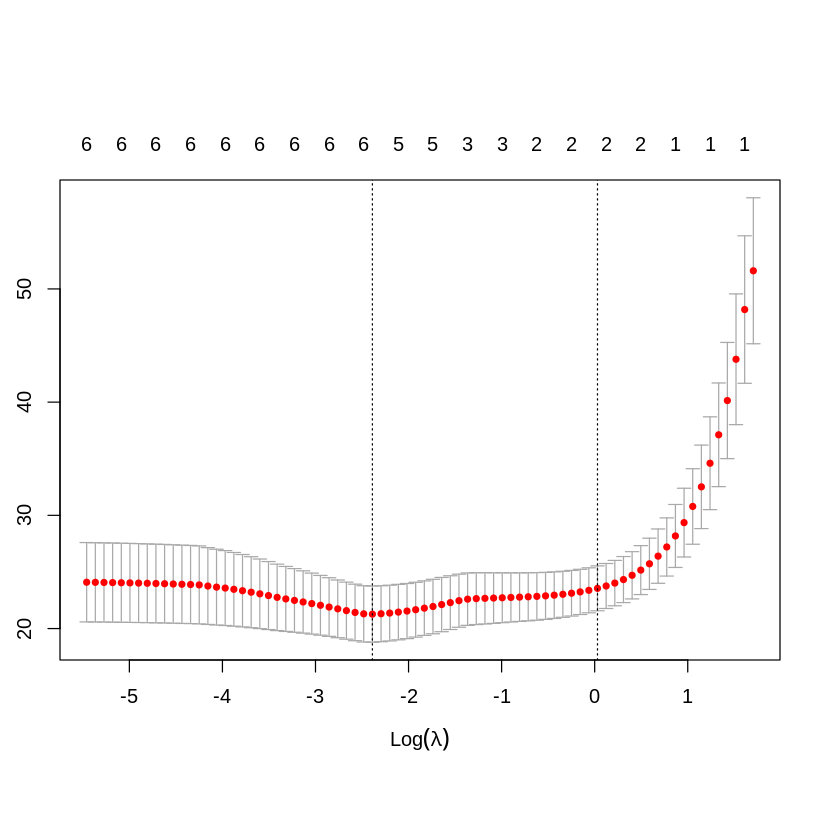

In [12]:
write.csv(df, 'result.csv', row.names = FALSE)

par(pin = c(6,4))
plot(clf_,  ylab = 'MSE')